In [137]:
#reseau neurone
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles

# Ensemble de donné

La dimension de X: (2, 100)
La dimension de y est: (1, 100)


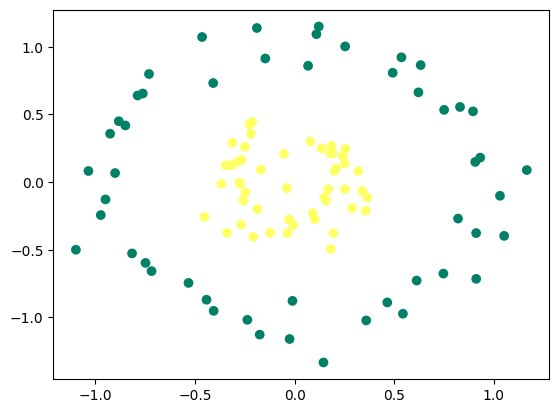

In [116]:
X,y=make_circles(n_samples=100,noise=0.1,factor=0.3,random_state=0)
X=X.T
y=y.reshape((1,y.shape[0]))


print("La dimension de X:",X.shape)
print("La dimension de y est:",y.shape)
plt.scatter(X[0,:],X[1,:],c=y,cmap='summer')
plt.show()

###Fonction du modèle

In [102]:
def initialisation(X):
    W=np.random.randn(X.shape[1],1)
    b=np.random.randn(1)
    return(W,b)

In [103]:
def model(X,W,b):
    Z=X.dot(W)+b
    A=1/(1+np.exp(-Z))
    return A

In [104]:
def cout(A,y):
    epsilon=1e-15
    return 1/len(y)*(np.sum(-y*np.log(A+epsilon)-(1-y)*np.log(1-A+epsilon)))

In [105]:
def gradients(A,X,y):
    dW=1/len(y)*np.dot(X.T,A-y)
    db=1/len(y)*np.sum(A-y)
    return (dW,db)

In [106]:
def update(dW,db,W,b,learning_rate):
    W=(W-learning_rate*dW)
    b=b-learning_rate*db
    return (W,b)
    

In [107]:
def predict(X,W,b):
    A=model(X,W,b)
    #print(A)
    return A>=0.5

In [108]:
from sklearn.metrics import accuracy_score

In [109]:
#un sueul neurone 
def artificial_neuron(X,y,learning_rate=0.01,n_iter=10000):
    #Initialisons W et b
    accuracy=[]
    W,b=initialisation(X)
    loss=[]
    for i in tqdm(range(n_iter)):
        A=model(X,W,b)
        if i%10==0:
            y_predict=predict(X,W,b)
            accuracy.append(accuracy_score(y,y_predict))
            loss.append(cout(A,y))
        
        dW,db=gradients(A,X,y)
        W,b=update(dW,db,W,b,learning_rate)
   
    #print(accuracy_score(y,y_predict))
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
     
    plt.plot(accuracy)
    plt.subplot(1,2,2)
    plt.plot(loss)
    plt.show()
    return (W,b)
    

100%|██████████████████████████████████| 10000/10000 [00:00<00:00, 20740.87it/s]


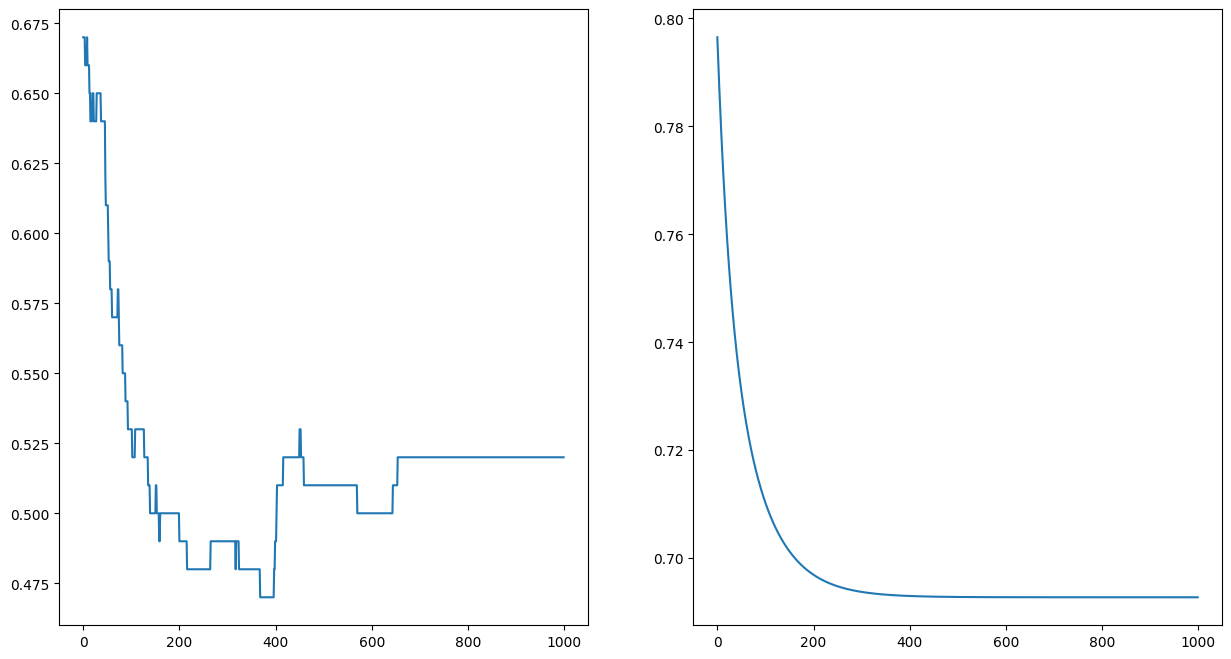

In [111]:
W,b=artificial_neuron(X,y)

In [112]:
#Frontière de décision
#fig,ax=plt.subplots(figsize=(9,6))
#ax.scatter(X[0,:],X[1,:],c=y,cmap='summer')
#x1=np.linspace(-1,4,100)
#x2=(-W[0]*x1-b)/W[1]
#ax.plot(x1,x2,c='orange',lw=3)

In [ ]:
#On remarque qu'a travers la  première courbe que le model est moins performant

In [113]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable


In [23]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(data=[go.Scatter3d( 
    x=X[:, 0].flatten(),
    y=X[:, 1].flatten(),
    z=y.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        color=y.flatten(),                
        colorscale='YlGn',  
        opacity=0.8,
        reversescale=True
    )
)])

fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

In [ ]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx0, xx1 = np.meshgrid(X0, X1)
Z = W[0] * xx0 + W[1] * xx1 + b
A = 1 / (1 + np.exp(-Z))

fig = (go.Figure(data=[go.Surface(z=A, x=xx0, y=xx1, colorscale='YlGn', opacity = 0.7, reversescale=True)]))

fig.add_scatter3d(x=X[:, 0].flatten(), y=X[:, 1].flatten(), z=y.flatten(), mode='markers', marker=dict(size=5, color=y.flatten(), colorscale='YlGn', opacity = 0.9, reversescale=True))


fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()


In [121]:
import h5py
import numpy as np


def load_data():
    train_dataset = h5py.File('datasets/trainset.hdf5', "r")
    X_train = np.array(train_dataset["X_train"][:]) # your train set features
    y_train = np.array(train_dataset["Y_train"][:]) # your train set labels

    test_dataset = h5py.File('datasets/testset.hdf5', "r")
    X_test = np.array(test_dataset["X_test"][:]) # your train set features
    y_test = np.array(test_dataset["Y_test"][:]) # your train set labels
    
    return X_train, y_train, X_test, y_test

In [148]:
from utilities import*

In [149]:
X_train,y_train,X_test,y_test=load_data()

In [124]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train,return_counts=True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500]))


In [125]:
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test,return_counts=True))

(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100]))


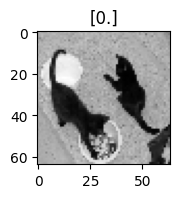

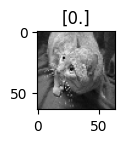

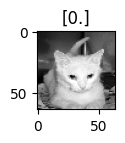

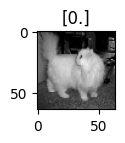

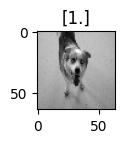

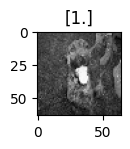

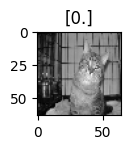

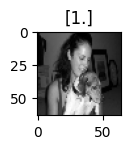

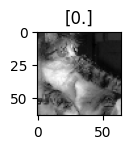

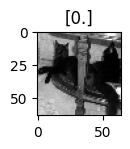

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

plt.figure(figsize=(15,7))
for i in range(10):
    plt.subplot(4,5,i+1)
    plt.imshow(X_train[i],cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
    plt.show()
    

In [ ]:
  W,b=artificial_neuron(X_train,y_train)

In [127]:
#Normalisation des pixels ***
X_train_reshape =(X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2]) )/255
X_train_reshape.shape

(1000, 4096)

In [128]:
X_test_reshape =(X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2]) )/255
X_test_reshape.shape

(200, 4096)

100%|████████████████████████████████████| 10000/10000 [00:53<00:00, 188.50it/s]


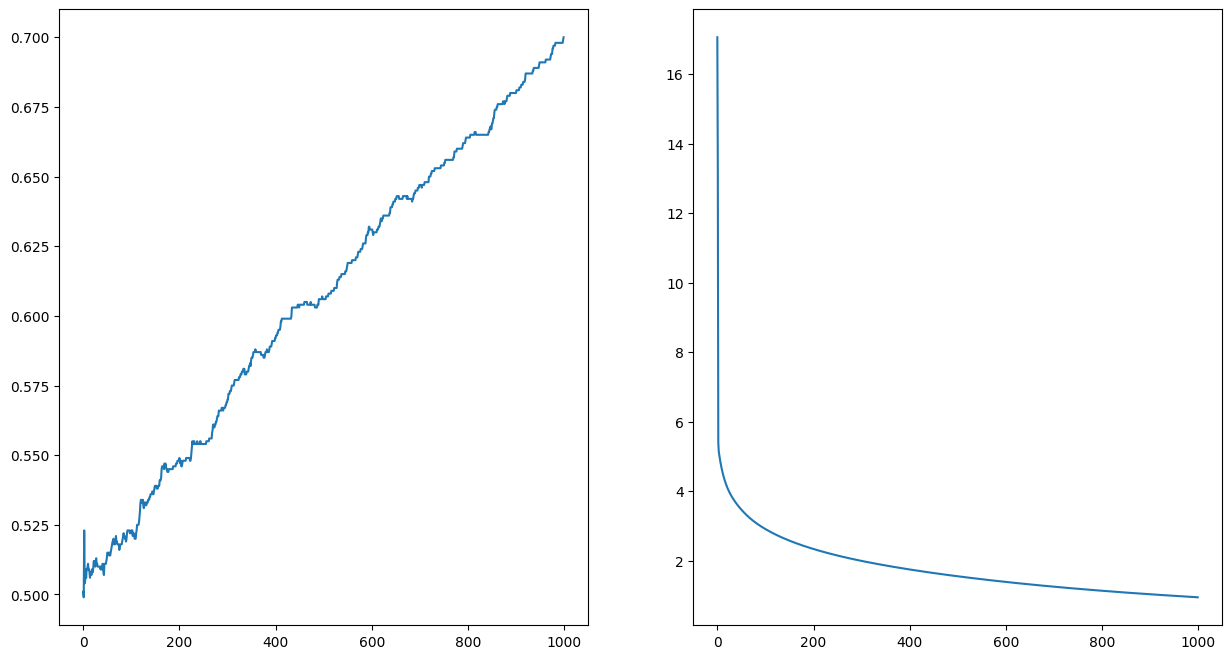

In [129]:
  W,b=artificial_neuron(X_train_reshape,y_train )  

In [ ]:
def artificial_neuron2(X_train,y_train,X_test,y_test,learning_rate=0.01,n_iter=10000):
    #Initialisons W et b
  
    W,b=initialisation(X_train)
    train_accuracy=[]
    train_loss=[]
    test_accuracy=[]
    test_loss=[]
    for i in tqdm(range(n_iter)):
        A_train=model(X_train,W,b)
        A_test=model(X_test,W,b)
        if i%10==0:
            #Entrainemant
            y_predict=predict(X_train,W,b)
            train_accuracy.append(accuracy_score(y_train,y_predict))
            train_loss.append(cout(A_train,y_train))

            #Test
            y_predict=predict(X_test,W,b)
            test_accuracy.append(accuracy_score(y_test,y_predict))
            test_loss.append(cout(A_test,y_test))
        #mise à jour des parametre
        dW,db=gradients(A_train,X_train,y_train)
        W,b=update(dW,db,W,b,learning_rate)
    y_predict=predict(X_train ,W,b)
    #print(accuracy_score(y,y_predict))
    
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    plt.plot(train_accuracy,label='train accuracy')
    plt.plot(test_accuracy,label='test accuracy')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(train_loss,label='train loss')
    plt.plot(test_loss,label='test loss')
    plt.legend()
    plt.show()
    return (W,b)
    

In [ ]:
W,b=artificial_neuron2(X_train_reshape,y_train,X_test_reshape,y_test)

In [61]:
def initialisation2(n0, n1, n2):
    W1=np.random.randn(n1,n0)
    b1=np.random.randn(n1,1)
    W2=np.random.randn(n2,n1)
    b2=np.random.randn(n2,1)
    parametres={
            'W1':W1,
            'b1':b1,
            'W2':W2,
            'b2':b2
    }
         
    return parametres
    


In [62]:
def forward_propagation(X,parametres):
    W1=parametres['W1']
    b1=parametres['b1']
    W2=parametres['W2']
    b2=parametres['b2']
    z1=W1.dot(X) + b1
    A1=1/(1 +np.exp(-z1))
    z2=W2.dot(A1) +b2
    A2=1/(1+np.exp(-z2))
    activations={
        'A1':A1,
        'A2':A2
    }
    return activations

In [63]:
def back_propagation(X,y,activations,parametres):
    A1=activations['A1']
    A2=activations['A2']
    W2=parametres['W2']
    m=y.shape[1]
    dz2=A2-y
    dW2=1/m*dz2.dot(A1.T)
    db2=1/m*np.sum(dz2,axis=1,keepdims=True)
    
    dz1=np.dot(W2.T,dz2)*A1*(1-A1)
    dW1=1/m*dz1.dot(X.T)
    db1=1/m*np.sum(dz1,axis=1,keepdims=True)
    gradients={
         'dW1':dW1,
         'db1':db1,
         'dW2':dW2,
         'db2':db2
    }
    return gradients
          

In [64]:
def upadate2(gradients,parametres,learning_rate):
    W1=parametres['W1']
    b1=parametres['b1']
    dW1=gradients['dW1']
    db1=gradients['db1']

    W2=parametres['W2']
    b2=parametres['b2']
    dW2=gradients['dW2']
    db2=gradients['db2']
    W1=(W1-learning_rate*dW1)
    b1=b1-learning_rate*db1
    
    W2=(W2-learning_rate*dW2)
    b2=b2-learning_rate*db2

    parametres={
            'W1':W1,
            'b1':b1,
            'W2':W2,
            'b2':b2
    }
         
    return parametres
    
  
    

In [65]:
def predict2(X,parametres):
    activations=forward_propagation(X,parametres)
    A2=activations['A2']
    return A2>=0.5

In [66]:
def neuronal_network(X_train,y_train,n1,learning_rate=0.01,n_iter=10000):
    #Initialisons W et b
    n0=X_train.shape[0]
    n2=y_train.shape[0]
    parametres=initialisation2(n0,n1,n2)
    train_accuracy=[]
    train_loss=[]
    #test_accuracy=[]
    #test_loss=[]
    for i in tqdm(range(n_iter)):
        activations=forward_propagation(X_train,parametres)
        gradients=back_propagation(X_train,y_train,activations,parametres)
        parametres=upadate2(gradients,parametres,learning_rate)
        #A_test=model(X_test,W,b)
        if i%10==0:
            #Entrainemant
            y_predict=predict2(X_train,parametres)
            train_loss.append(cout(y_train,activations['A2']))
            current_accuracy=accuracy_score(y_train.flatten(),y_predict.flatten())
            train_accuracy.append(current_accuracy)

            #Test
           # y_predict=predict(X_test,W,b)
            #test_accuracy.append(accuracy_score(y_test,y_predict))
            #test_loss.append(cout(A_test,y_test))
        #mise à jour des parametre
        #dW,db=gradients(A_train,X_train,y_train)
        #W,b=update(dW,db,W,b,learning_rate)
    #y_predict=predict(X_train ,W,b)
    #print(accuracy_score(y,y_predict))
    
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    plt.plot(train_accuracy,label='train accuracy')
    #plt.plot(test_accuracy,label='test accuracy')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(train_loss,label='train loss')
    #plt.plot(test_loss,label='test loss')
    plt.legend()
    plt.show()
    return parametres
    

100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 8365.15it/s]


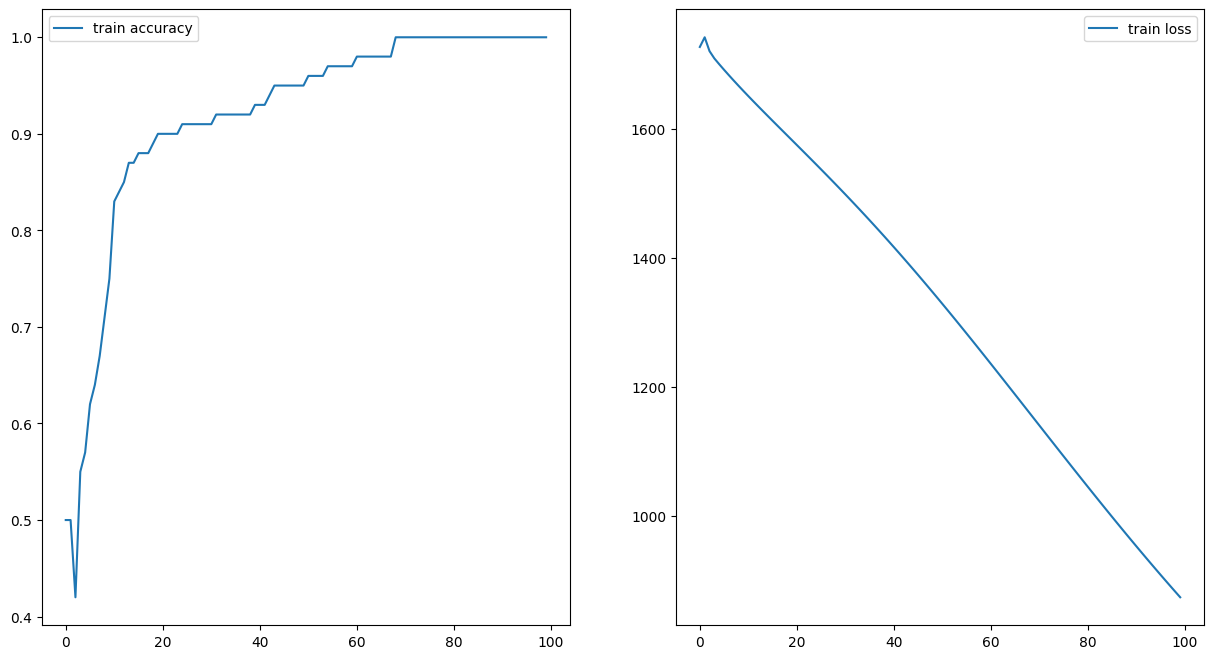

In [118]:
parametres=neuronal_network(X,y,n1=32,learning_rate=0.1,n_iter=1000)

In [119]:
# a travers la deuxième courbe on remarque que l'apprensissage n'est pas termine 
#a travers la première on remarque que le tau d'apprenstissage semble se stav=biliser a partir d'un certain seuil(68)

In [130]:
#Entrainement du reseau de neurone sur la réconnaissance de photo de chats et de chients


In [155]:
import h5py
import numpy as np


def load_data():
    train_dataset = h5py.File('datasets/trainset.hdf5', "r")
    X_train = np.array(train_dataset["X_train"][:]) # your train set features
    y_train = np.array(train_dataset["Y_train"][:]) # your train set labels

    test_dataset = h5py.File('datasets/testset.hdf5', "r")
    X_test = np.array(test_dataset["X_test"][:]) # your train set features
    y_test = np.array(test_dataset["Y_test"][:]) # your train set labels
    
    return X_train, y_train, X_test, y_test

In [156]:
X_train,y_train,X_test,y_test=load_data()

In [157]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train,return_counts=True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500]))


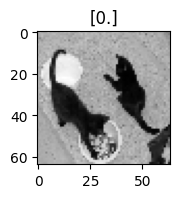

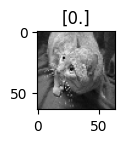

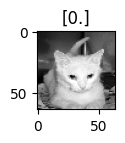

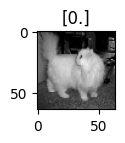

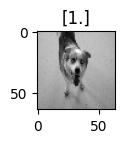

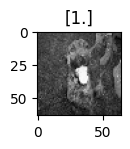

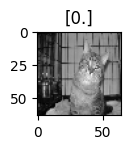

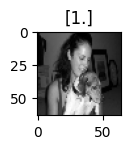

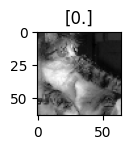

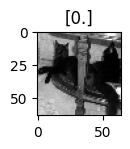

In [158]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

plt.figure(figsize=(15,7))
for i in range(10):
    plt.subplot(4,5,i+1)
    plt.imshow(X_train[i],cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
    plt.show()
    

In [159]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(1000, 64, 64)
(200, 64, 64)
(1000, 1)
(200, 1)


In [160]:
#Redimensionnement des photos
y_train=y_train.T
y_test=y_test.T

X_train=X_train.T
X_train_reshape=X_train.reshape(-1, X_train.shape[-1])/255
X_test=X_test.T
X_test_reshape=X_test.reshape(-1,X_test.shape[-1])/255
m_train=300
m_test=80
X_test_reshape=X_test_reshape[:, :m_test]
X_train_reshape=X_train_reshape[:, :m_train]

y_test=y_test[:, :m_test]
y_train=y_train[:, :m_train]
print(X_train_reshape.shape)
print(X_test_reshape.shape)
print(y_train.shape)
print(y_test.shape)

(4096, 300)
(4096, 80)
(1, 300)
(1, 80)


100%|█████████████████████████████████████| 10000/10000 [02:22<00:00, 70.20it/s]


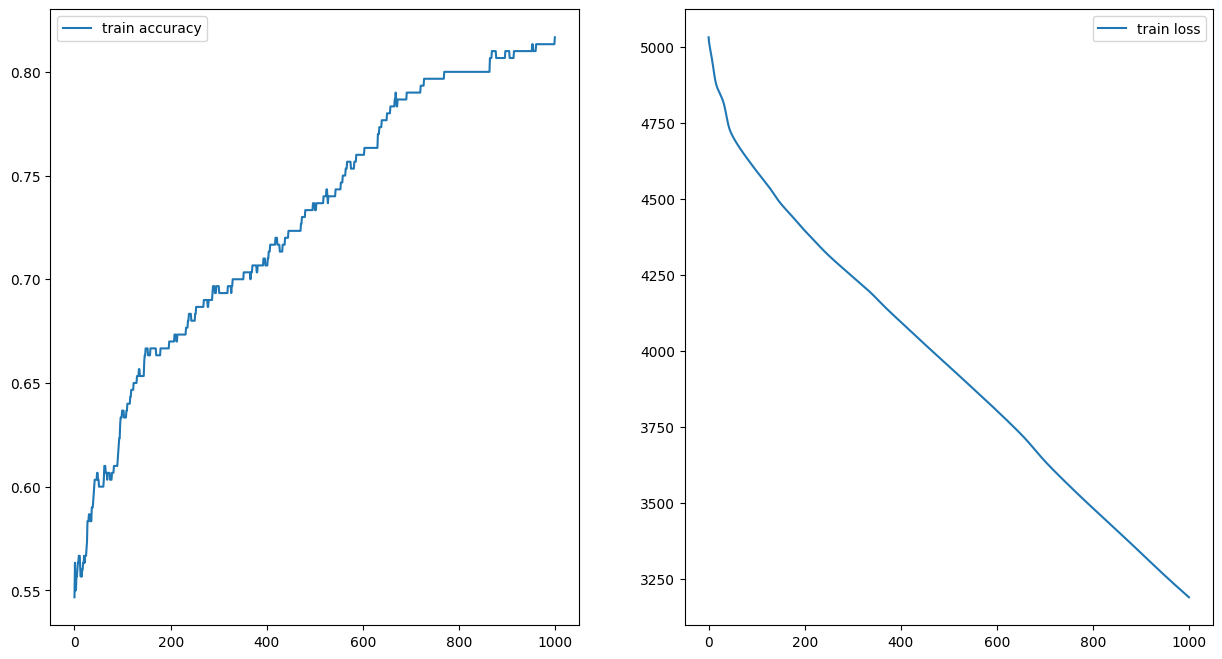

In [161]:
parametres_photos=neuronal_network(X_train_reshape,y_train,n1=32,learning_rate=0.01,n_iter=10000)